In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [47]:
file_path = '../data/evaluation/nasa_tlx/rag-survey.csv'
df = pd.read_csv(file_path)
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q46_7,Q46_8,Q46_9,Q46_10,Q46_11,Q46_12,Q46_13,Q46_14,Q46_15,GROUP
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,GROUP
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/War...","{""ImportId"":""endDate"",""timeZone"":""Europe/Warsaw""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID46_7""}","{""ImportId"":""QID46_8""}","{""ImportId"":""QID46_9""}","{""ImportId"":""QID46_10""}","{""ImportId"":""QID46_11""}","{""ImportId"":""QID46_12""}","{""ImportId"":""QID46_13""}","{""ImportId"":""QID46_14""}","{""ImportId"":""QID46_15""}","{""ImportId"":""GROUP""}"
2,2023-12-06 21:36:43,2023-12-06 22:01:57,IP Address,89.64.7.66,100,1514,True,2023-12-06 22:01:58,R_2a8LU9MdwtC3oaL,NaN,...,2,2,2,1,2,2,1,1,2,rag-test-9952
3,2023-12-08 08:59:43,2023-12-08 09:27:39,IP Address,212.51.207.170,100,1676,True,2023-12-08 09:27:40,R_1Ii8PYND4bGYO4w,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-7555
4,2023-12-08 08:59:46,2023-12-08 09:34:29,IP Address,212.51.207.170,100,2083,True,2023-12-08 09:34:30,R_21tTKvpWu9M58Ea,NaN,...,2,2,1,2,1,2,1,1,1,rag-test-8369
5,2023-12-06 23:36:28,2023-12-08 17:42:06,IP Address,5.173.112.116,100,151537,True,2023-12-08 17:42:07,R_3e9mHt8PdMuBfeI,NaN,...,2,2,2,1,1,1,1,1,2,rag-test-8369
6,2023-12-09 13:51:32,2023-12-09 14:00:49,IP Address,77.237.29.221,100,556,True,2023-12-09 14:00:50,R_DI7YvpkeLaHakX7,NaN,...,2,1,1,1,1,2,2,1,1,rag-test-8369
7,2023-12-09 13:42:21,2023-12-09 14:01:29,IP Address,37.225.84.90,100,1148,True,2023-12-09 14:01:30,R_1FLplvVQH9SnGCw,NaN,...,2,1,1,2,2,1,2,2,2,rag-test-9952
8,2023-12-10 14:33:57,2023-12-10 15:00:19,IP Address,31.183.100.151,100,1582,True,2023-12-10 15:00:20,R_3emERB8PpFSyWCn,NaN,...,1,2,1,2,2,2,2,2,1,rag-test-9952
9,2023-12-11 09:28:05,2023-12-11 10:52:19,IP Address,79.184.252.219,100,5053,True,2023-12-11 10:52:20,R_3oByTPpdhOID1KZ,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-9632


In [37]:
cleaned_df = df.drop(index=[0, 1], columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
                                            'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
                                            'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
                                            'ExternalReference', 'LocationLatitude', 'LocationLongitude',
                                            'DistributionChannel', 'UserLanguage'])

In [38]:
cleaned_df

,Q33,Q31,Q32,Q32.1,Q33.1,Q23,Q2,Q3,Q4,Q17,...,Q46_7,Q46_8,Q46_9,Q46_10,Q46_11,Q46_12,Q46_13,Q46_14,Q46_15,GROUP
2,25-34,Male,Engineer's degree,Yes,Daily,"using the ""when"" statement in a conditional ""...",NaN,NaN,NaN,NaN,...,2,2,2,1,2,2,1,1,2,rag-test-9952
3,18-24,Male,High school degree or equivalent,Yes,Daily,NaN,NaN,Answering is not possible given the available ...,NaN,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-7555
4,18-24,Male,High school degree or equivalent,Yes,Daily,NaN,NaN,NaN,NaN,NaN,...,2,2,1,2,1,2,1,1,1,rag-test-8369
5,18-24,Female,Bachelor's degree,Yes,Once a month,NaN,NaN,NaN,An SCTP endpoint should use the ASSOCIATE pri...,NaN,...,2,2,2,1,1,1,1,1,2,rag-test-8369
6,18-24,Female,Engineer's degree,Yes,Few times per week,NaN,NaN,"In the iSCSI protocol, command numbering is m...",NaN,NaN,...,2,1,1,1,1,2,2,1,1,rag-test-8369
7,25-34,Male,Engineer's degree,Yes,Few times per year,NaN,NaN,session-wide,Use the ASSOCIATE primitive,NaN,...,2,1,1,2,2,1,2,2,2,rag-test-9952
8,18-24,Male,Bachelor's degree,Yes,Daily,YANG allows the use of conditional augmentatio...,The OAuth authorization framework [RFC6749] de...,NaN,NaN,NaN,...,1,2,1,2,2,2,2,2,1,rag-test-9952
9,25-34,Male,Master's degree,Yes,Few times per week,NaN,NaN,NaN,Answer: An SCTP endpoint should use the ASSOCI...,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-9632
10,25-34,Male,Master's degree,No,Daily,Can we add new mandatory leafs to the configur...,OAuth facilitates federated authentication in ...,NaN,NaN,NaN,...,2,2,2,1,1,2,1,1,2,rag-test-9952
11,25-34,Male,Engineer's degree,Yes,Few times per month,NaN,NaN,"n the iSCSI protocol, command numbering is man...",According to the SCTP protocol documents [RFC9...,NaN,...,1,2,2,2,2,1,1,1,2,rag-test-9632


In [45]:
new_column_types = {
    'Age': str,
    'Gender': str,
    'Educational level': str,
    'Previously used AI chat': str,
    'Working with technical documentation': str,

    'Q0 RAG': str,
    'Q1 RAG': str,
    'Q2 RAG': str,
    'Q3 RAG': str,
    'Q4 RAG': str,
    'Q5 RAG': str,
    'Q6 RAG': str,
    'Q7 RAG': str,
    'Q8 RAG': str,
    'Q9 RAG': str,

    'Base mental demand RAG': int,
    'Base physical demand RAG': int,
    'Base temporal demand RAG': int,
    'Base performance RAG': int,
    'Base effort RAG': int,
    'Base frustration RAG': int,

    'Effort or Performance RAG': int,
    'Temporal demand or Frustration RAG': int,
    'Temporal demand or Effort RAG': int,
    'Physical demand or Frustration RAG': int,
    'Performance or Frustration RAG': int,
    'Physical demand or Temporal demand RAG': int,
    'Physical demand or Performance RAG': int,
    'Temporal demand or Mental demand RAG': int,
    'Frustration or Effort RAG': int,
    'Performance or Mental demand RAG': int,
    'Performance or Temporal demand RAG': int,
    'Mental demand or Effort RAG': int,
    'Mental demand or Physical demand RAG': int,
    'Effort or Physical demand RAG': int,
    'Frustration or Mental demand RAG': int,
    # -------------------------------------------
    'Q0 NONRAG': str,
    'Q1 NONRAG': str,
    'Q2 NONRAG': str,
    'Q3 NONRAG': str,
    'Q4 NONRAG': str,
    'Q5 NONRAG': str,
    'Q6 NONRAG': str,
    'Q7 NONRAG': str,
    'Q8 NONRAG': str,
    'Q9 NONRAG': str,

    'Base mental demand NONRAG': int,
    'Base physical demand NONRAG': int,
    'Base temporal demand NONRAG': int,
    'Base performance NONRAG': int,
    'Base effort NONRAG': int,
    'Base frustration NONRAG': int,

    'Effort or Performance NONRAG': int,
    'Temporal demand or Frustration NONRAG': int,
    'Temporal demand or Effort NONRAG': int,
    'Physical demand or Frustration NONRAG': int,
    'Performance or Frustration NONRAG': int,
    'Physical demand or Temporal demand NONRAG': int,
    'Physical demand or Performance NONRAG': int,
    'Temporal demand or Mental demand NONRAG': int,
    'Frustration or Effort NONRAG': int,
    'Performance or Mental demand NONRAG': int,
    'Performance or Temporal demand NONRAG': int,
    'Mental demand or Effort NONRAG': int,
    'Mental demand or Physical demand NONRAG': int,
    'Effort or Physical demand NONRAG': int,
    'Frustration or Mental demand NONRAG': int,

    'Configuration': str,
}

cleaned_df = cleaned_df.rename(columns=dict(zip(cleaned_df.columns.tolist(), new_column_types.keys()))).astype(new_column_types)

In [46]:
points_for_rag_answers = [
    20,
    10,
    20,
    20,
    20,
    20,
    20,
    20,
    10,
    20,
    20,
    0,
    20,
    20,
    10,
    10,
    20,
    20,
    10,
    20,
    20,
    10,
]

points_for_nonrag_answers = [
    20,
    0,
    0,
    0,
    0,
    10,
    10,
    20,
    10,
    20,
    10,
    0,
    0,
    10,
    20,
    10,
    0,
    0,
    0,
    20,
    20,
    10
]

cleaned_df['Actual performance NONRAG'] = points_for_nonrag_answers
cleaned_df['Actual performance RAG'] = points_for_rag_answers
cleaned_df = cleaned_df.astype({'Actual performance NONRAG': int,
                                'Actual performance RAG': int})

In [7]:
groups_dict = {
    "rag-test-8369": 'openai_openai',
    "rag-test-7555": 'local_openai',
    "rag-test-9952": 'openai_local',
    "rag-test-9632": 'local_local',
}

cleaned_df['Configuration'] = cleaned_df['Configuration'].replace(groups_dict)

In [8]:
rag_labels = {
    'Effort or Performance RAG': {1: 'Effort', 2: 'Performance'},
    'Temporal demand or Frustration RAG': {1: 'Temporal demand', 2: 'Frustration'},
    'Temporal demand or Effort RAG': {1: 'Temporal demand', 2: 'Effort'},
    'Physical demand or Frustration RAG': {1: 'Physical demand', 2: 'Frustration'},
    'Performance or Frustration RAG': {1: 'Performance', 2: 'Frustration'},
    'Physical demand or Temporal demand RAG': {1: 'Physical demand', 2: 'Temporal demand'},
    'Physical demand or Performance RAG': {1: 'Physical demand', 2: 'Performance'},
    'Temporal demand or Mental demand RAG': {1: 'Temporal demand', 2: 'Mental demand'},
    'Frustration or Effort RAG': {1: 'Frustration', 2: 'Effort'},
    'Performance or Mental demand RAG': {1: 'Performance', 2: 'Mental demand'},
    'Performance or Temporal demand RAG': {1: 'Performance', 2: 'Temporal demand'},
    'Mental demand or Effort RAG': {1: 'Mental demand', 2: 'Effort'},
    'Mental demand or Physical demand RAG': {1: 'Mental demand', 2: 'Physical demand'},
    'Effort or Physical demand RAG': {1: 'Effort', 2: 'Physical demand'},
    'Frustration or Mental demand RAG': {1: 'Frustration', 2: 'Mental demand'},
}

nonrag_labels = {
    'Effort or Performance NONRAG': {1: 'Effort', 2: 'Performance'},
    'Temporal demand or Frustration NONRAG': {1: 'Temporal demand', 2: 'Frustration'},
    'Temporal demand or Effort NONRAG': {1: 'Temporal demand', 2: 'Effort'},
    'Physical demand or Frustration NONRAG': {1: 'Physical demand', 2: 'Frustration'},
    'Performance or Frustration NONRAG': {1: 'Performance', 2: 'Frustration'},
    'Physical demand or Temporal demand NONRAG': {1: 'Physical demand', 2: 'Temporal demand'},
    'Physical demand or Performance NONRAG': {1: 'Physical demand', 2: 'Performance'},
    'Temporal demand or Mental demand NONRAG': {1: 'Temporal demand', 2: 'Mental demand'},
    'Frustration or Effort NONRAG': {1: 'Frustration', 2: 'Effort'},
    'Performance or Mental demand NONRAG': {1: 'Performance', 2: 'Mental demand'},
    'Performance or Temporal demand NONRAG': {1: 'Performance', 2: 'Temporal demand'},
    'Mental demand or Effort NONRAG': {1: 'Mental demand', 2: 'Effort'},
    'Mental demand or Physical demand NONRAG': {1: 'Mental demand', 2: 'Physical demand'},
    'Effort or Physical demand NONRAG': {1: 'Effort', 2: 'Physical demand'},
    'Frustration or Mental demand NONRAG': {1: 'Frustration', 2: 'Mental demand'},
}



In [34]:
rag_weights = pd.DataFrame(index=cleaned_df.index)

# Iterate through each mapping and count occurrences
for column, mapping in rag_labels.items():
    for value, label in mapping.items():
        rag_weights[label] = rag_weights.get(label, 0) + (cleaned_df[column] == value)

# Display the resulting DataFrame
rag_weights.rename(columns={
    'Effort': 'weight effort RAG',
    'Performance': 'weight performance RAG',
    'Temporal demand': 'weight temporal demand RAG',
    'Physical demand': 'weight physical demand RAG',
    'Mental demand': 'weight mental demand RAG',
    'Frustration': 'weight frustration RAG',
}, inplace=True)

# rag_weights
rag_weights.mean(axis=0)

weight effort RAG             3.545455
weight performance RAG        3.318182
weight temporal demand RAG    2.409091
weight frustration RAG        1.772727
weight physical demand RAG    1.181818
weight mental demand RAG      2.772727
dtype: float64

In [32]:
nonrag_weights = pd.DataFrame(index=cleaned_df.index)

# Iterate through each mapping and count occurrences
for column, mapping in nonrag_labels.items():
    for value, label in mapping.items():
        nonrag_weights[label] = nonrag_weights.get(label, 0) + (cleaned_df[column] == value)

# Display the resulting DataFrame
nonrag_weights.rename(columns={
    'Effort': 'weight effort NONRAG',
    'Performance': 'weight performance NONRAG',
    'Temporal demand': 'weight temporal demand NONRAG',
    'Physical demand': 'weight physical demand NONRAG',
    'Mental demand': 'weight mental demand NONRAG',
    'Frustration': 'weight frustration NONRAG',
}, inplace=True)

nonrag_weights.mean(axis=0)

weight effort NONRAG             3.136364
weight performance NONRAG        2.545455
weight temporal demand NONRAG    2.227273
weight frustration NONRAG        2.727273
weight physical demand NONRAG    1.409091
weight mental demand NONRAG      2.954545
dtype: float64

In [11]:
augmented_df = pd.concat([cleaned_df, rag_weights, nonrag_weights], axis=1)
augmented_df

,Age,Gender,Educational level,Previously used AI chat,Working with technical documentation,Q0 RAG,Q1 RAG,Q2 RAG,Q3 RAG,Q4 RAG,...,weight temporal demand RAG,weight frustration RAG,weight physical demand RAG,weight mental demand RAG,weight effort NONRAG,weight performance NONRAG,weight temporal demand NONRAG,weight frustration NONRAG,weight physical demand NONRAG,weight mental demand NONRAG
2,25-34,Male,Engineer's degree,Yes,Daily,"using the ""when"" statement in a conditional ""...",nan,nan,nan,nan,...,2,4,1,3,3,4,4,0,1,3
3,18-24,Male,High school degree or equivalent,Yes,Daily,nan,nan,Answering is not possible given the available ...,nan,nan,...,1,3,1,2,3,0,3,5,1,3
4,18-24,Male,High school degree or equivalent,Yes,Daily,nan,nan,nan,nan,nan,...,2,5,0,4,4,2,1,5,0,3
5,18-24,Female,Bachelor's degree,Yes,Once a month,nan,nan,nan,An SCTP endpoint should use the ASSOCIATE pri...,nan,...,2,1,2,2,3,5,1,0,2,4
6,18-24,Female,Engineer's degree,Yes,Few times per week,nan,nan,"In the iSCSI protocol, command numbering is m...",nan,nan,...,3,0,2,1,4,3,1,5,2,0
7,25-34,Male,Engineer's degree,Yes,Few times per year,nan,nan,session-wide,Use the ASSOCIATE primitive,nan,...,2,0,2,3,1,2,4,3,2,3
8,18-24,Male,Bachelor's degree,Yes,Daily,YANG allows the use of conditional augmentatio...,The OAuth authorization framework [RFC6749] de...,nan,nan,nan,...,2,1,0,5,3,0,2,5,3,2
9,25-34,Male,Master's degree,Yes,Few times per week,nan,nan,nan,Answer: An SCTP endpoint should use the ASSOCI...,nan,...,1,2,0,3,4,0,2,5,1,3
10,25-34,Male,Master's degree,No,Daily,Can we add new mandatory leafs to the configur...,OAuth facilitates federated authentication in ...,nan,nan,nan,...,2,1,2,1,3,5,2,1,1,3
11,25-34,Male,Engineer's degree,Yes,Few times per month,nan,nan,"n the iSCSI protocol, command numbering is man...",According to the SCTP protocol documents [RFC9...,nan,...,2,1,3,4,4,0,3,2,1,5


In [12]:
metrics = ['mental demand', 'physical demand','temporal demand', 'performance', 'effort', 'frustration']
models = ['RAG', 'NONRAG']

for model in models:
    for metric in metrics:
        augmented_df[f'Balanced {metric} {model}'] = augmented_df[f'Base {metric} {model}'] * augmented_df[f'weight {metric} {model}']

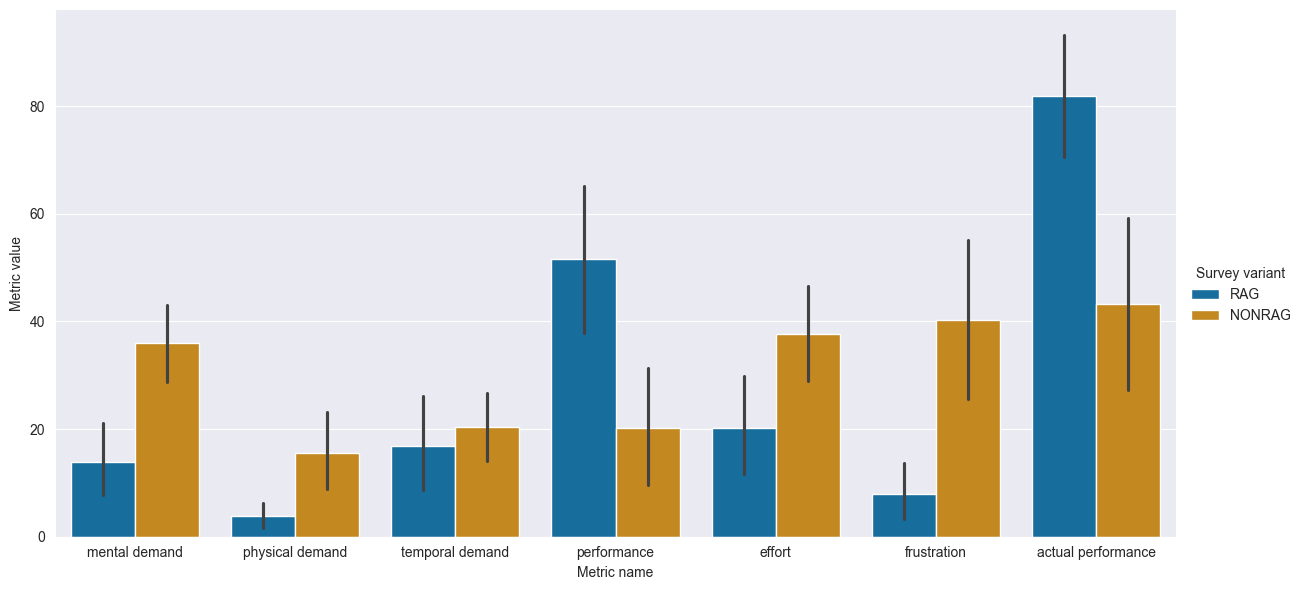

In [50]:
rag_scores = copy.deepcopy(augmented_df[['Balanced mental demand RAG', 'Balanced physical demand RAG', 'Balanced temporal demand RAG', 'Balanced performance RAG', 'Balanced effort RAG', 'Balanced frustration RAG']])
rag_scores.columns = metrics
rag_scores['actual performance'] = augmented_df['Actual performance RAG'] * 5
rag_scores['Survey variant'] = 'RAG'

nonrag_scores = copy.deepcopy(augmented_df[['Balanced mental demand NONRAG', 'Balanced physical demand NONRAG', 'Balanced temporal demand NONRAG', 'Balanced performance NONRAG', 'Balanced effort NONRAG', 'Balanced frustration NONRAG']])
nonrag_scores.columns = metrics
nonrag_scores['actual performance'] = augmented_df['Actual performance NONRAG'] * 5
nonrag_scores['Survey variant'] = 'NONRAG'

melted_df = pd.melt(pd.concat([rag_scores, nonrag_scores]), id_vars=["Survey variant"], var_name="Metric name", value_name="Metric value")

# Create a grouped catplot
sns.catplot(data=melted_df, x="Metric name", y="Metric value", hue="Survey variant", kind="bar", aspect=2, height=6, palette="colorblind")

# Show the plot
plt.show()

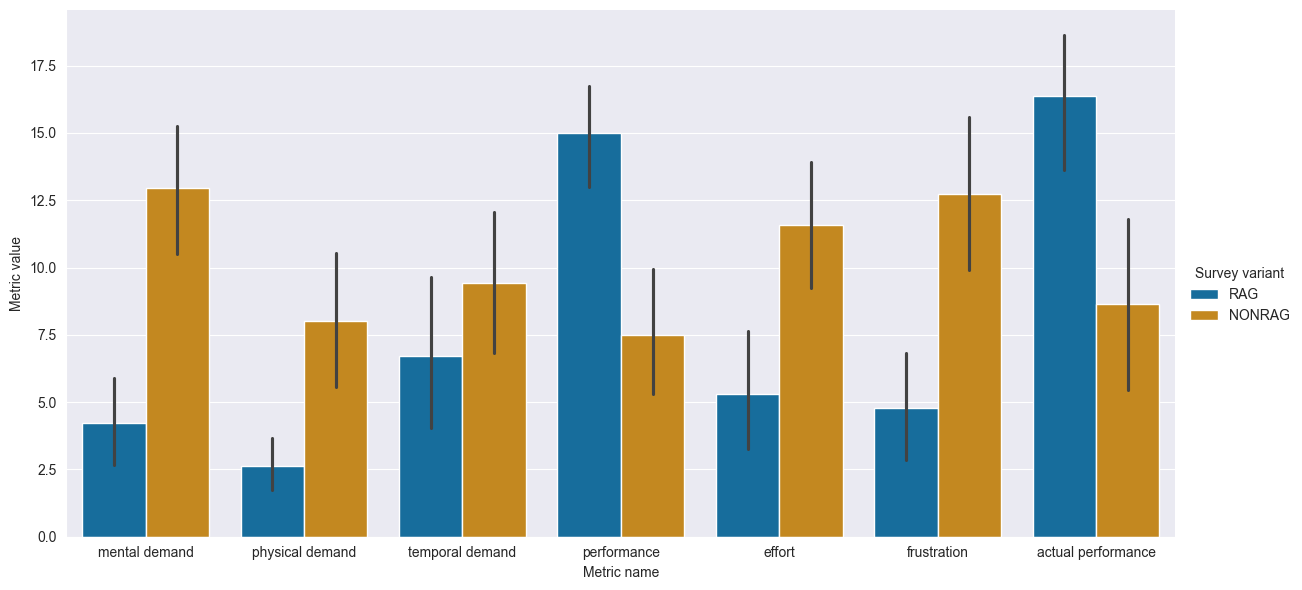

In [49]:
rag_scores = copy.deepcopy(augmented_df[['Base mental demand RAG', 'Base physical demand RAG', 'Base temporal demand RAG', 'Base performance RAG', 'Base effort RAG', 'Base frustration RAG']])
rag_scores.columns = metrics
rag_scores['actual performance'] = augmented_df['Actual performance RAG']
rag_scores['Survey variant'] = 'RAG'

nonrag_scores = copy.deepcopy(augmented_df[['Base mental demand NONRAG', 'Base physical demand NONRAG', 'Base temporal demand NONRAG', 'Base performance NONRAG', 'Base effort NONRAG', 'Base frustration NONRAG']])
nonrag_scores.columns = metrics
nonrag_scores['actual performance'] = augmented_df['Actual performance NONRAG']
nonrag_scores['Survey variant'] = 'NONRAG'

melted_df = pd.melt(pd.concat([rag_scores, nonrag_scores]), id_vars=["Survey variant"], var_name="Metric name", value_name="Metric value")

# Create a grouped catplot
sns.catplot(data=melted_df, x="Metric name", y="Metric value", hue="Survey variant", kind="bar", aspect=2, height=6, palette="colorblind")

# Show the plot
plt.show()